<a href="https://colab.research.google.com/github/wdavjr/wd-mta-major-incidents-analysis/blob/main/mta_major_incidents_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MTA Subway Major Incidents

Name: Willie L. Davis, Jr.

Date: 12/29/2024

### Contact

Twitter:

GitHub:

Email:

## Introduction

### Welcome to the MTA Subway Major Incidents Analysis!

Are you curious about the factors causing major delays in the largest public transportation network in North America? Perhaps you’re interested in understanding the root causes of disruptions or analyzing trends to inform better decision-making. This tutorial is designed to help you dive deep into the MTA Subway Major Incidents dataset, even if you're new to data analysis.

In this tutorial, we'll guide you step-by-step through the process of exploring, analyzing, and visualizing data on unplanned incidents that disrupt subway service. You'll learn how to clean and structure the dataset, uncover key insights, and create compelling visualizations to communicate your findings effectively.

**What You'll Learn:**

1. **Understanding the Dataset**: Get acquainted with the MTA Subway Major Incidents dataset, including its structure, categories, and limitations.
2. **Data Cleaning and Preparation**: Learn how to preprocess the data to handle inconsistencies and ensure accurate analysis.
3. **Exploratory Data Analysis (EDA)**: Analyze trends, identify patterns, and uncover insights across subway lines and incident categories.
4. **Data Visualization**: Create insightful plots to highlight trends and communicate key findings effectively.
5. **Statistical Analysis**: Understand the broader implications of major incident categories and their impact on subway performance.

By the end of this tutorial, you'll have a solid understanding of the MTA Subway Major Incidents dataset and the tools to perform insightful analysis. Whether you're a transportation enthusiast, a data analyst, or a policymaker, this tutorial will empower you to explore and understand the dynamics of major subway disruptions.

Let's get started and uncover the stories hidden in the data!

## Install Required Packages

First, ensure you have the required packages installed. Run the following command in a Jupyter notebook cell:

!pip install pandas numpy matplotlib seaborn

In [2]:
# !pip install pandas numpy matplotlib seaborn

## Import Necessary Libraries

Import the necessary libraries for our analysis.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load data and create DataFrame

In [4]:
def load_new_dataframe(file_path):
    df = pd.read_csv(file_path)

    # Define a mapping of month numbers to 3-letter month abbreviations
    month_map = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
                 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

    # Convert 'month' to datetime, extract month, map to month names
    df['month_name'] = pd.to_datetime(df['month'], errors='coerce').dt.month.map(month_map)

    # Make sure 'month' is a datetime, and create 'month_year' column for year-month
    df['month_year'] = pd.to_datetime(df['month'], errors='coerce').dt.to_period('M')

    return df

# Load data
path = f'https://raw.githubusercontent.com/wdavjr/wd-mta-major-incidents-analysis/refs/heads/main/MTA_Subway_Major_Incidents__Beginning_2020.csv'
incidents = load_new_dataframe(path)


### What is the total number of major incidents recorded in the dataset?


In [5]:
# Calculate the total number of major incidents
total_incidents = incidents['count'].sum()

print(f"Total number of major incidents: {total_incidents:,}")

Total number of major incidents: 2,567


### How many unique subway lines are included in the dataset?


In [6]:
# Calculate the unique count of subway lines
unique_lines = incidents['line'].nunique()

print(f"Total number of unique subway lines: {unique_lines:,}")

Total number of unique subway lines: 23


### What are the distributions of incident counts across the six categories?

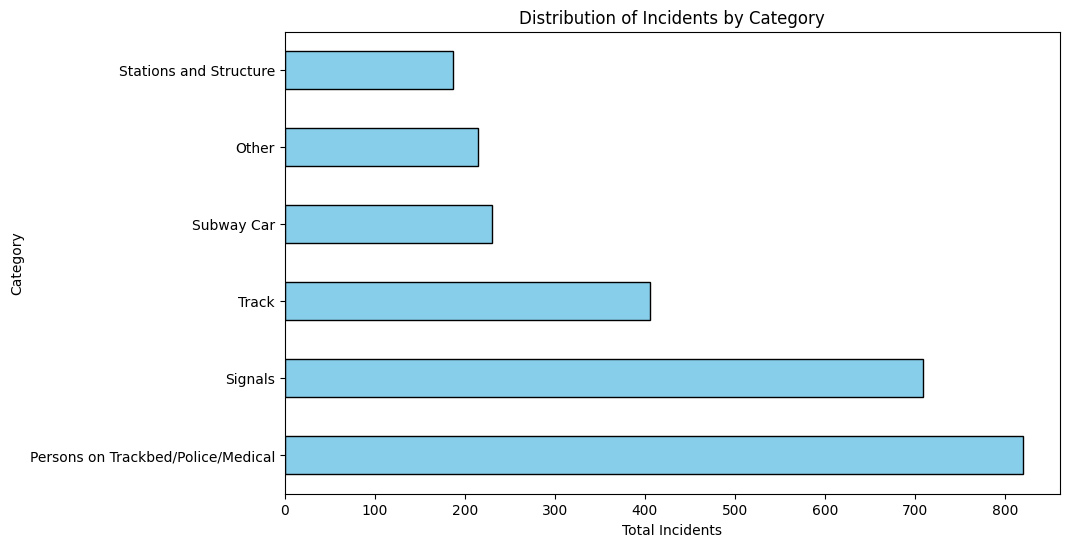

In [7]:
# Group the 'incidents' DataFrame by the 'category' column.
category_totals = (incidents.groupby('category')['count']
                   .sum() # calculate the total number of incidents for each category
                   .sort_values(ascending=False)
                   )

# Create a figure and axes explicitly
fig, ax = plt.subplots(figsize=(10, 6))

# Create the plot
category_totals.plot(kind='barh', color='skyblue', edgecolor='black')

# Add labels and title
ax.set_xlabel('Total Incidents')  # Label for the x-axis
ax.set_ylabel('Category')  # Label for the y-axis
ax.set_title("Distribution of Incidents by Category")

# Show the plot
plt.show()

### What is the average number of incidents per month for each subway division?

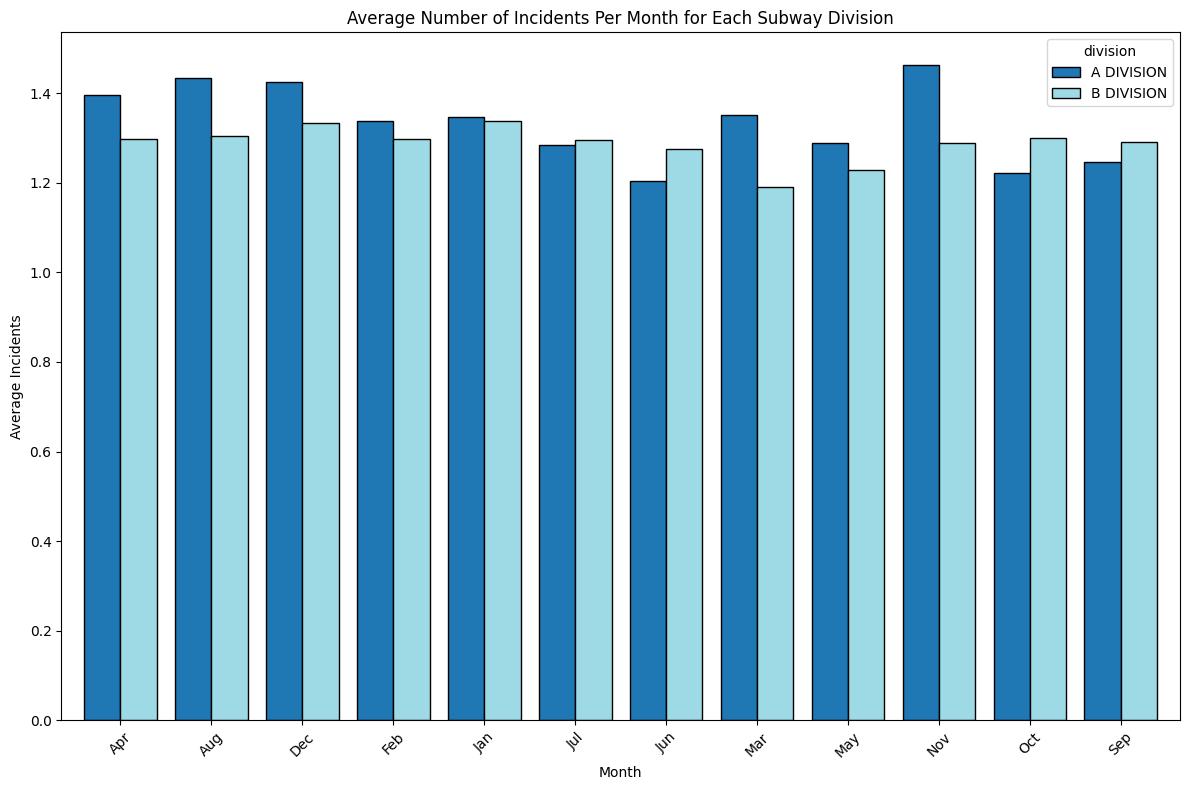

In [8]:
# Group by both 'division' and 'month_name' and calculate the average incidents
category_monthly_average = (incidents.groupby(['division', 'month_name'])['count']
                            .agg('mean')  # Calculate the mean for each group
                            .reset_index()  # Flatten the DataFrame for easier plotting
                            .sort_values(by='month_name')  # Sort by month to maintain chronological order
                            )

# Create a figure and axes explicitly
fig, ax = plt.subplots(figsize=(12, 8))

# Pivot the data for easier plotting
pivot_data = category_monthly_average.pivot(index='month_name', columns='division', values='count')

# Create a bar plot (grouped bars)
pivot_data.plot(kind='bar', ax=ax, width=0.8, colormap='tab20', edgecolor='black')

# Add labels and title
ax.set_xlabel('Month')
ax.set_ylabel('Average Incidents')
ax.set_title('Average Number of Incidents Per Month for Each Subway Division')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()  # Ensure this is included to show the plot

### How do the total incidents vary over time (month-wise trends)?


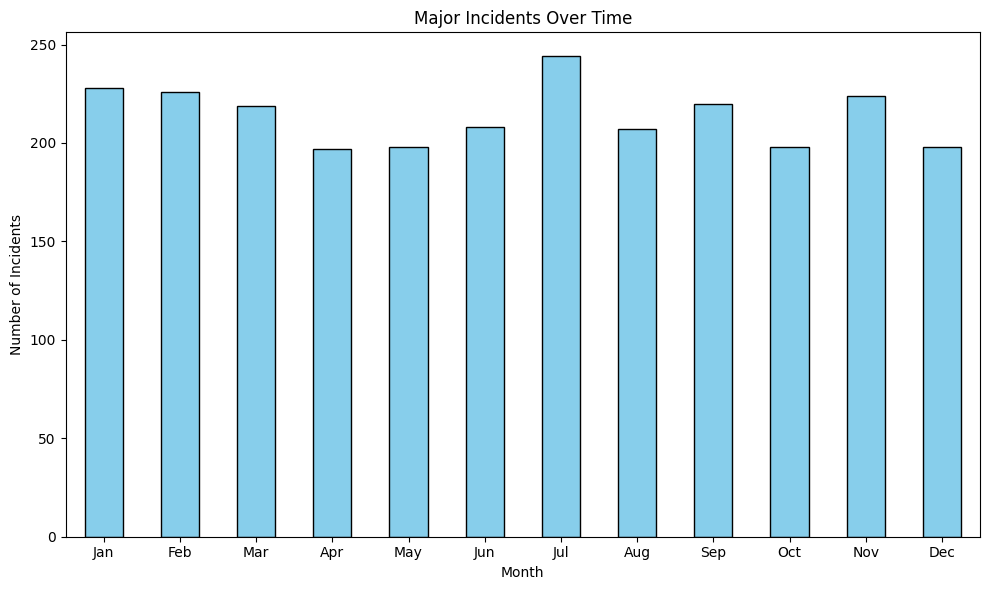

In [9]:
# Group by 'month_name' and sum 'count'
grouped_monthly_incidents = incidents.groupby('month_name')['count'].sum()

# Define the correct month order (Jan, Feb, ..., Dec)
ordered_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Reorder the months in the correct order
grouped_monthly_incidents = grouped_monthly_incidents[ordered_months]

# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 6))  # You can adjust the size here

# Plotting the bar chart on the axes 'ax'
grouped_monthly_incidents.plot(kind='bar', ax=ax, color='skyblue', title='Major Incidents Over Time', edgecolor='black')

# Add labels and title to the axes
ax.set_xlabel('Month')
ax.set_ylabel('Number of Incidents')

# Improve x-axis readability and layout
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.tight_layout()  # Adjust layout to prevent clipping of labels

# Show the plot
plt.show()

### Are there specific months with higher counts of "Persons on Trackbed/Police/Medical" incidents?

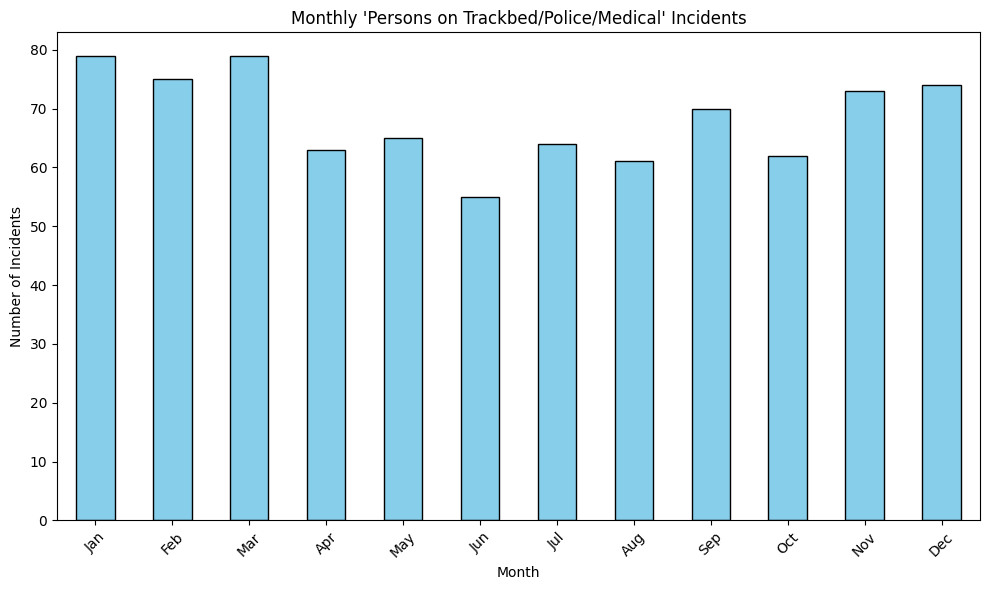

The months with the highest number of 'Persons on Trackbed/Police/Medical' incidents (79 incidents) are:
month_name
Jan    79
Mar    79
Name: count, dtype: int64


In [10]:
# Filter dataset for incidents where category is "Persons on Trackbed/Police/Medical"
trackbed_incidents = incidents[incidents["category"] == "Persons on Trackbed/Police/Medical"]

# Group by 'month_name' and sum the 'count' of incidents, ensuring correct month order
ordered_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_trackbed_incidents = trackbed_incidents.groupby('month_name')['count'].sum()[ordered_months]

# Find the months with the highest incident counts
max_incidents_value = monthly_trackbed_incidents.max()
months_with_max_incidents = monthly_trackbed_incidents[monthly_trackbed_incidents == max_incidents_value]

# Create figure and plot
fig, ax = plt.subplots(figsize=(10, 6))
monthly_trackbed_incidents.plot(kind='bar', color='skyblue', ax=ax, title="Monthly 'Persons on Trackbed/Police/Medical' Incidents", edgecolor='black')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print the months with the highest number of incidents
print(f"The months with the highest number of 'Persons on Trackbed/Police/Medical' incidents ({max_incidents_value} incidents) are:")
print(months_with_max_incidents)


In [11]:
incidents.head()

,month,division,line,day_type,category,count,month_name,month_year
0,2020-01-01,A DIVISION,1,1,Other,1,Jan,2020-01
1,2020-01-01,A DIVISION,2,1,Persons on Trackbed/Police/Medical,1,Jan,2020-01
2,2020-01-01,A DIVISION,2,2,Other,1,Jan,2020-01
3,2020-01-01,A DIVISION,3,1,Persons on Trackbed/Police/Medical,1,Jan,2020-01
4,2020-01-01,A DIVISION,3,1,Signals,2,Jan,2020-01


### Which subway line has the highest number of incidents overall?

In [16]:
# Group by 'line' and sum the 'count' of incidents for each line
most_line = incidents.groupby('line')['count'].sum().sort_values(ascending=False)

# Extract the line name and the corresponding incident count
line_with_highest_incidents = most_line.idxmax()  # Gets the line with the max incidents
incidents_count = most_line.max()  # Gets the number of incidents for that line

# Print the result
print(f"The subway line with the highest number of incidents is {line_with_highest_incidents} with {incidents_count} incidents.")


The subway line with the highest number of incidents is 6 with 216 incidents.


### What is the average number of incidents across all subway lines, and which lines exceed this average?

Average number of incidents across all lines: 1.3056968463886063




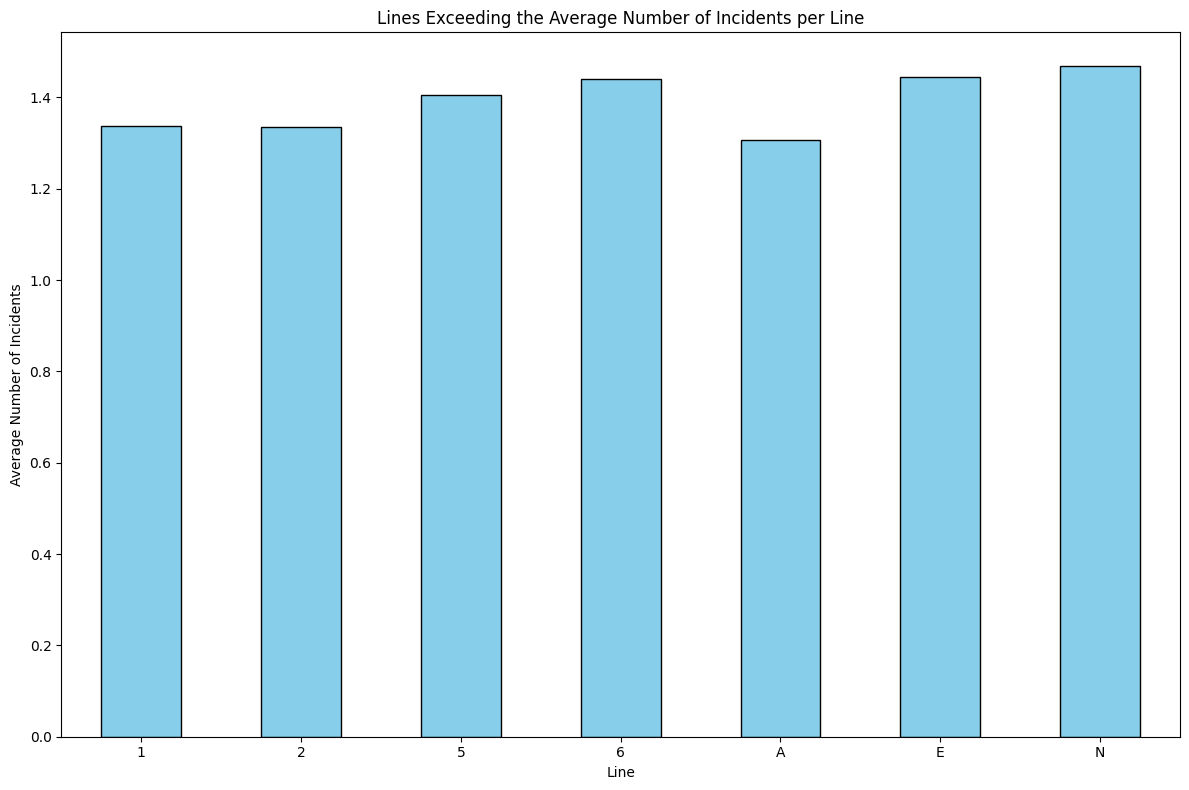

In [63]:
# Calculate the overall average of incidents across all subway lines.
overall_average_incidents = incidents['count'].mean()

# Calculate the average number of incidents per line
average_line_incidents = incidents.groupby('line')['count'].mean()

# Find the lines where the average incidents per line exceed the overall average
lines_exceeding_average = average_line_incidents[average_line_incidents > overall_average_incidents]

# Print the results
print(f"Average number of incidents across all lines: {overall_average_incidents}\n\n")

# Plotting the lines exceeding the average number of incidents per line
fig, ax = plt.subplots(figsize=(12, 8))
lines_exceeding_average.plot(kind='bar', color='skyblue', edgecolor='black', ax=ax, title="Lines Exceeding the Average Number of Incidents per Line")
ax.set_xlabel('Line')
ax.set_ylabel('Average Number of Incidents')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### How do incidents on Line 1 differ from those on Line 2 in terms of categories and counts?

### What is the total count of incidents on weekdays compared to weekends?

### Which categories of incidents are more frequent on weekdays versus weekends?

### Do specific lines have a higher proportion of incidents on weekends?

### What is the total number of incidents in the A Division versus the B Division?

### Are there differences in the most frequent incident categories between the two divisions?

### Is there a significant difference in average monthly incidents between the A and B Divisions?


### Which category of incidents is most common, and on which line does it occur most often?

### How do track-related incidents compare in frequency to signal-related incidents across all lines?

### Are certain categories more prevalent in one division over the other?

### Are there outliers in the data where a specific line or month has unusually high incident counts?

### What is the correlation between "day_type" and incident count?

### Can you identify any seasonality or patterns in the data for incident counts across the months?

### What are the mean, median, and standard deviation of incident counts across all records?

### Can you create a pivot table to summarize incident counts by division and category?

### Can you visualize the data trends using matplotlib or seaborn (e.g., bar plots, line plots)?

### How can NumPy be used to calculate the percentage of incidents per category?